### Travel Insurance logistic Regression

##### Requirement:
 The goal of the project is to predict wheather the insurance policies are claimed or not based on some features. Usually, insurance policies will have coverage for travelers concerns including flight delays,trip cancellation, or laggage loss. Some of  insurance policies will have coverage for medical emergency
    

Data Source : https://www.kaggle.com/mhdzahier/travel-insurance
    

### Import Libraries

let's import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.linear_model import LogisticRegression

let's read travel insurance data

In [44]:
data = pd.read_csv("travel insurance.csv")

In [45]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


#### Explorartory Data Analysis

#### The Missing Data

In [46]:
data.isnull()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
63321,False,False,False,False,False,False,False,False,False,False,False
63322,False,False,False,False,False,False,False,False,False,False,False
63323,False,False,False,False,False,False,False,False,False,False,False
63324,False,False,False,False,False,False,False,False,False,False,False


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [48]:
data.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

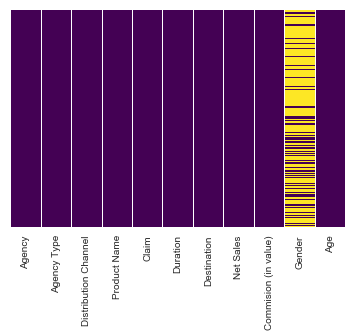

In [49]:
sns.heatmap(data.isnull(),yticklabels= False,cbar = False,cmap='viridis')

Observation : We are missing too much of Gender data

#### Data Visiualization

let's visiualize the data

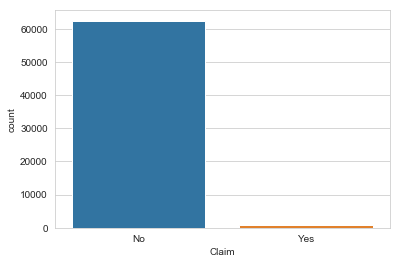

In [50]:
sns.set_style('whitegrid')
sns.countplot(x = 'Claim',data = data)

In [51]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


observation : There are less amount of claimed or more amount of Unclaim

In [52]:
def cleanYesNo(s):
   # Claim = s[0]
    if s == "No":
        return 0
    else:
        return 1

In [53]:
data['Claim0'] = data['Claim'].apply(cleanYesNo)

In [54]:
data.head(26)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim0
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.00,9.57,F,81,0
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.00,9.57,F,71,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.50,29.70,NaN,32,0
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.60,23.76,NaN,32,0
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.80,11.88,NaN,41,0
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.00,42.35,F,44,0
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.60,23.76,NaN,32,0
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.90,65.34,NaN,29,0
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.80,11.88,NaN,44,0
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.00,59.40,NaN,37,0


In [55]:
data.drop(['Claim','Gender'],axis=1,inplace=True)

In [56]:
data.groupby(["Agency"]).mean()

,Duration,Net Sales,Commision (in value),Age,Claim0
Agency,,,,,
ADM,54.914634,53.256098,38.254878,23.804878,0.000000
ART,30.359517,28.691601,10.553927,60.314199,0.003021
C2B,95.219910,78.865811,20.533124,37.749244,0.066167
CBH,91.950495,27.168317,10.030693,57.128713,0.009901
CCR,62.809278,30.654639,10.313351,67.572165,0.015464
CSR,79.895349,32.802326,10.824767,57.511628,0.011628
CWT,41.450350,43.040769,32.380615,40.291841,0.010023
EPX,39.158860,32.564993,0.000000,36.933740,0.005553
JWT,29.371162,53.012016,21.640053,118.000000,0.005340


In [57]:
data.groupby(['Agency Type']).mean()

,Duration,Net Sales,Commision (in value),Age,Claim0
Agency Type,,,,,
Airlines,67.728991,53.015767,15.526401,45.00275,0.033855
Travel Agency,42.309795,36.015604,7.634419,38.05459,0.007325


In [58]:
data[data["Duration"] <0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim0
14943,JZI,Airlines,Online,Basic Plan,-2,BANGLADESH,22.0,7.7,118,0
52587,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,0
52588,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,0
56668,JZI,Airlines,Online,Basic Plan,-1,INDONESIA,18.0,6.3,118,0
59528,JZI,Airlines,Online,Basic Plan,-1,CHINA,22.0,7.7,118,0


In [59]:
data[data['Age']>100]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim0
10,JZI,Airlines,Online,Basic Plan,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.10,118,0
105,JWT,Airlines,Online,Value Plan,11,INDIA,50.0,20.00,118,0
220,JWT,Airlines,Online,Value Plan,4,INDIA,62.0,24.80,118,0
367,JWT,Airlines,Online,Value Plan,16,INDIA,50.0,20.00,118,0
402,CCR,Travel Agency,Offline,Comprehensive Plan,5,MALAYSIA,29.0,9.57,118,0
...,...,...,...,...,...,...,...,...,...,...
62920,JWT,Airlines,Online,Value Plan,2,INDIA,31.0,12.40,118,0
62953,ART,Airlines,Online,Value Plan,14,FRANCE,59.0,20.65,118,0
63096,ART,Airlines,Online,Value Plan,42,HONG KONG,61.0,21.35,118,0
63182,JWT,Airlines,Online,Value Plan,21,INDIA,39.0,15.60,118,0


In [60]:
data.loc[data['Duration'] < 0, 'Duration'] = 49.317
data.loc[data['Age'] > 100, 'Age'] = 39.969981

In [61]:
data.describe()

,Duration,Net Sales,Commision (in value),Age,Claim0
count,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.321062,40.702018,9.809992,38.757500,0.014639
std,101.790576,48.845637,19.804388,10.019733,0.120102
min,0.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,26.530000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.550000,42.000000,0.000000
max,4881.000000,810.000000,283.500000,88.000000,1.000000


In [62]:
print("Claimed")
print(data[data['Claim0']==1]['Claim0'].count())
print("Not Claimed")
print(data[data['Claim0']==0]['Claim0'].count())


Claimed
927
Not Claimed
62399


Observation : Imbalanced dataset appears here. Oversampling method will be performed to deal with  imbalanced dataset

#### Train and Test Splitting data

In [63]:
X = data.drop(columns=['Claim0'])
y = data['Claim0']

In [64]:
X_train,X_test,Y_train,y_test =  train_test_split(X,y,test_size=0.33,random_state=30)

In [65]:
X_train.shape

(42428, 9)

In [66]:
Y_train.shape

(42428,)

In [67]:
X_test.shape

(20898, 9)

In [68]:
y_test.shape

(20898,)

In [69]:
import warnings
warnings.filterwarnings("ignore")

#### Oversampling

oversampling should be performed in that number of claimed policies is much less than number of non-claimed policies.So oversampling 
is used to address the line

In [70]:
updated_x = X_train.drop(columns=["Agency","Agency Type","Distribution Channel","Product Name","Destination"])

In [71]:
updated_x

,Duration,Net Sales,Commision (in value),Age
51485,16.0,39.0,9.75,22.0
36964,4.0,9.9,5.94,61.0
11382,14.0,27.0,0.00,36.0
17039,69.0,93.6,23.40,24.0
7038,10.0,10.0,0.00,36.0
...,...,...,...,...
33268,41.0,0.0,0.00,36.0
44845,105.0,73.0,0.00,36.0
48045,9.0,49.5,29.70,31.0
4517,9.0,20.0,0.00,27.0


In [72]:
Y_train

51485    0
36964    0
11382    0
17039    0
7038     0
        ..
33268    0
44845    0
48045    0
4517     0
38693    0
Name: Claim0, Length: 42428, dtype: int64

In [31]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [73]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled,y_resampled = ros.fit_resample(updated_x,Y_train)

In [74]:
x_resampled

,Duration,Net Sales,Commision (in value),Age
0,16.0,39.00,9.75,22.0
1,4.0,9.90,5.94,61.0
2,14.0,27.00,0.00,36.0
3,69.0,93.60,23.40,24.0
4,10.0,10.00,0.00,36.0
...,...,...,...,...
83635,379.0,256.20,166.53,33.0
83636,365.0,449.25,112.31,37.0
83637,20.0,40.00,0.00,28.0
83638,21.0,69.50,17.38,83.0


In [75]:
y_resampled.shape

(83640,)

In [76]:
x_test_updated = X_test.drop(columns = ["Agency", "Agency Type", "Distribution Channel", "Product Name", "Destination"])

In [77]:
x_test_updated

,Duration,Net Sales,Commision (in value),Age
47929,1.0,20.00,0.00,36.0
37647,7.0,25.00,0.00,35.0
775,9.0,35.25,8.81,28.0
10951,382.0,291.75,72.94,29.0
14366,364.0,291.75,72.94,31.0
...,...,...,...,...
62250,29.0,19.80,11.88,39.0
369,3.0,15.00,6.00,48.0
60091,3.0,29.70,17.82,34.0
33141,63.0,80.00,0.00,52.0


In [78]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_resampled,y_resampled)
y_pred = clf.predict(x_test_updated)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [79]:
clf.score(x_resampled,y_resampled)

0.6451578192252511

In [80]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[16459  4120]
 [  158   161]]


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88     20579
           1       0.04      0.50      0.07       319

    accuracy                           0.80     20898
   macro avg       0.51      0.65      0.48     20898
weighted avg       0.98      0.80      0.87     20898

